In [8]:
def fullprocess(a):
    import scanpy as sc
    import numpy as np
    import pandas as pd
    a=sc.read_csv(a,delimiter="\t",first_column_names=True)
    a=a.transpose()
    a=a[:,~a.var_names.str.contains('__')]
    a=a[~a.obs_names.str[:8].str.contains('HCF01102')]
    a.obs['plate']=a.obs_names.str[4:8]
    #create a new column in adata.obs called time, 0h includes 0101 and 0601 in abata.obs_names,48h that include 0701 in adata.obs_names, 72h that include 0201 and 0801 in adata.obs_names,96h that include 0301,0302 and 0901 in adata.obs_names, 120h include the rest in adata.obs_names
    a.obs['time'] = 'time'
    a.obs.loc[a.obs_names.str.contains('0101|0601'), 'time'] = '0h'
    a.obs.loc[a.obs_names.str.contains('0701'), 'time'] = '48h'
    a.obs.loc[a.obs_names.str.contains('0201|0801'), 'time'] = '72h'
    a.obs.loc[a.obs_names.str.contains('0301|0302|0901'), 'time'] = '96h'

#whatever is left go to 120h
    a.obs.loc[a.obs['time'] == 'time', 'time'] = '120h'

    a.obs


    adata=a


    sc.pp.filter_cells(adata, min_genes=3000)
    sc.pp.filter_genes(adata, min_cells=3)
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
    sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

    sc.pp.normalize_total(adata, target_sum=1e4)

    sc.pp.log1p(adata)

    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

    sc.pl.highly_variable_genes(adata)

    adata = adata[:, adata.var.highly_variable]

    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

    sc.pp.scale(adata, max_value=10)

    sc.tl.pca(adata, svd_solver='arpack')

    sc.pl.pca(adata, color=['time'])

    sc.pp.neighbors(adata, n_neighbors=6, n_pcs=20)
    sc.tl.draw_graph(adata)


    sc.tl.louvain(adata, resolution=0.3)

    sc.tl.paga(adata, groups='louvain')

    sc.pl.paga(adata, color=['time', 'louvain'])


    #umap plot
    sc.tl.umap(adata)
    sc.pl.umap(adata, color=['time', 'louvain','plate'])


    adata.write_h5ad(r"/home/jacky/huaitaodata/scRNA/fullprocess.h5ad")
    

/tmp/ipykernel_62468/2115819684.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  a.obs['plate']=a.obs_names.str[4:8]


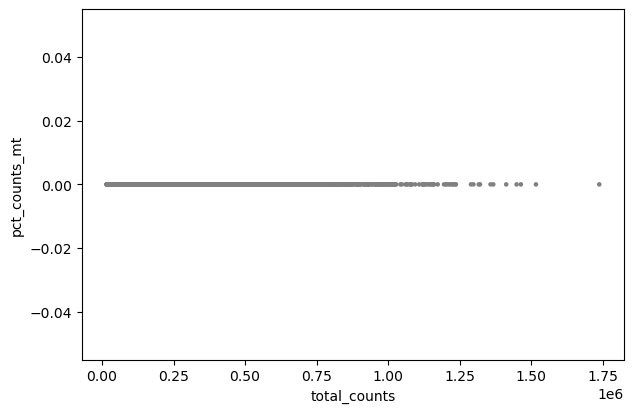

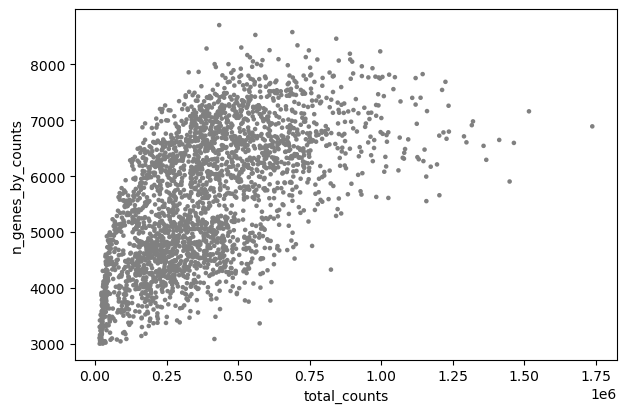

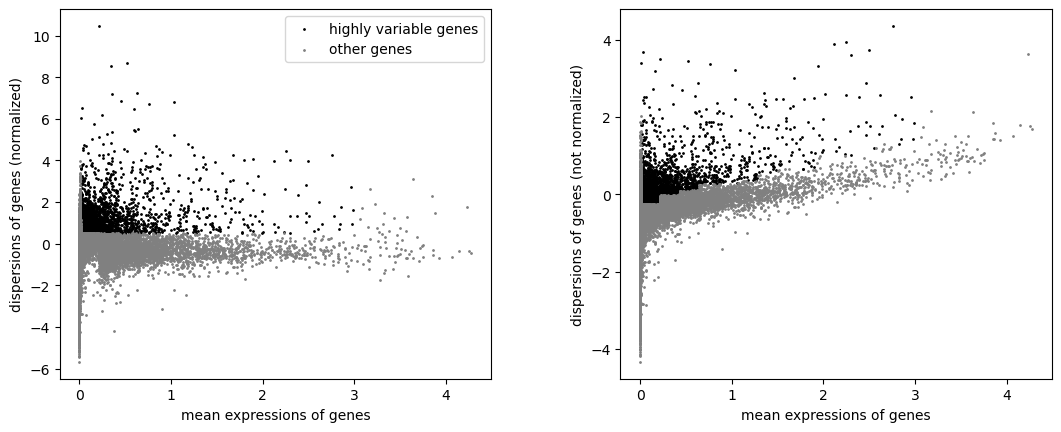

/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


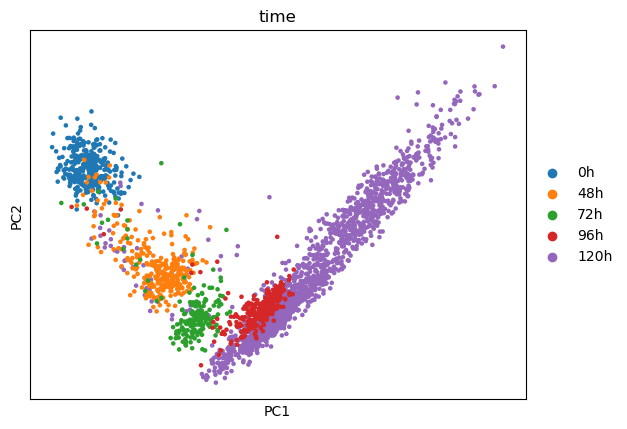

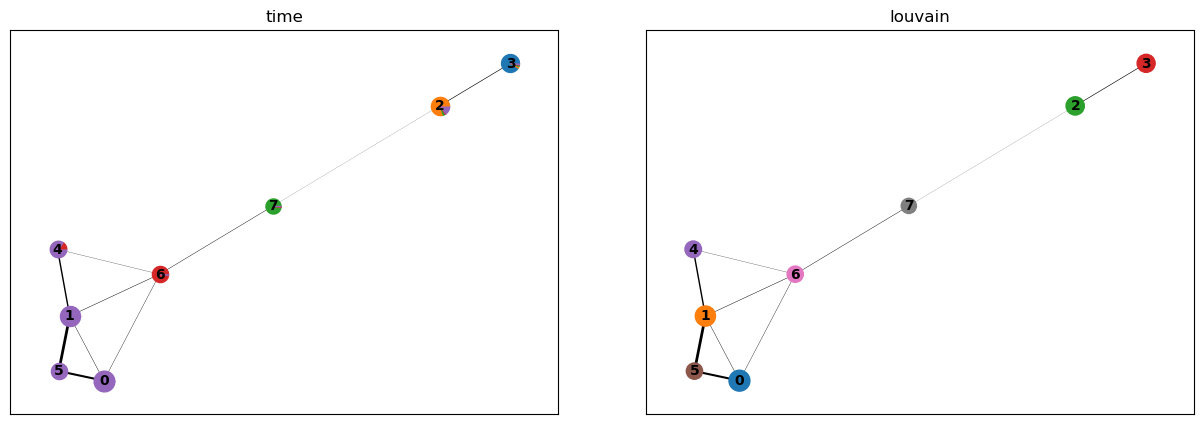

/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


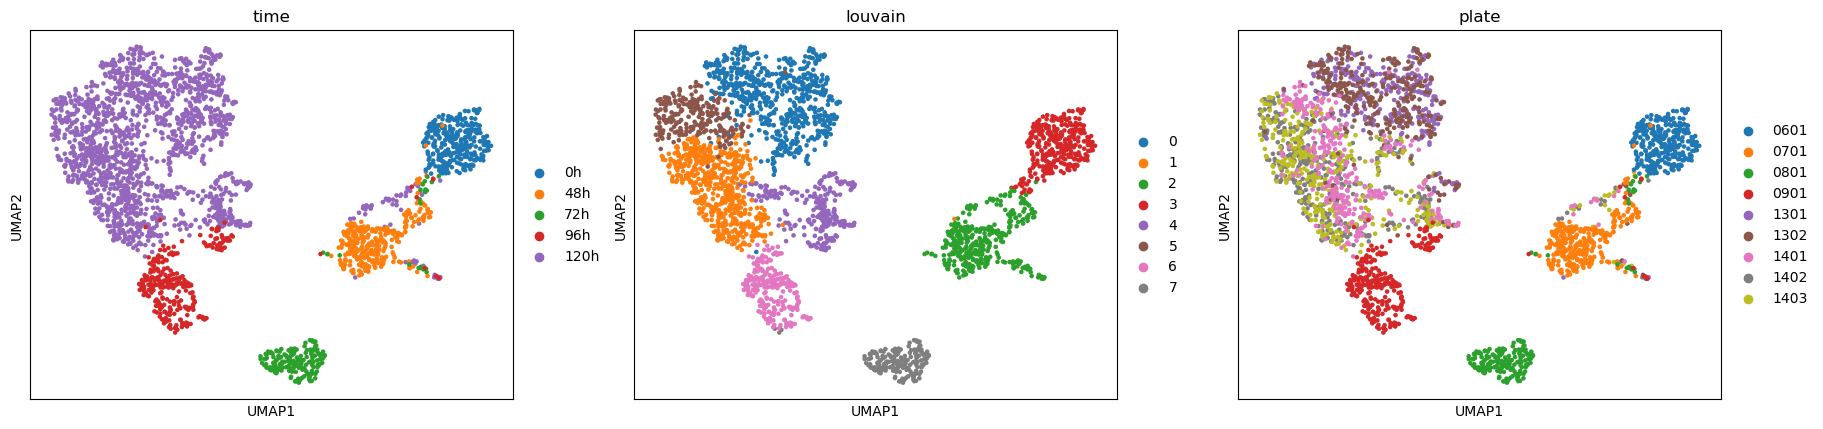

In [9]:
fullprocess(r"/home/jacky/huaitaodata/scRNA/rna_counts.tsv.gz")